# 비타민 A, C 섭취의 영향 - 202055122 민병언

    많은 형태의 건강보조식품 중 국민건강영양조사에 나와있는 두 가지 비타민인 비타민A,C에 대하여 이 두 비타민의 섭취량에 따라 건강에 미치는 영향을 조사하고자 한다. 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
sns.set()
%matplotlib inline
%precision 3

'%.3f'

In [2]:
data10 = pd.read_excel('hn10_all.xlsx')
data11 = pd.read_excel('hn11_all.xlsx')
data12 = pd.read_excel('hn12_all.xlsx')
data13 = pd.read_excel('hn13_all.xlsx')
data14 = pd.read_excel('hn14_all.xlsx')
data15 = pd.read_excel('hn15_all.xlsx')
data16 = pd.read_excel('hn16_all.xlsx')
data17 = pd.read_excel('hn17_all.xlsx')
data18 = pd.read_excel('hn18_all.xlsx')
data19 = pd.read_excel('hn19_all.xlsx')

In [3]:
data=pd.concat([data10,data11,data12,data13,data14,data15,data16,data17,data18,data19])
data

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,BS12_47_1,BS12_47_2,HE_nc,HE_insulin_etc,HE_DM_HbA1c,HE_HBsAg_etc,HE_Ucrea_etc,HE_Ualb_etc,N_FOLATE,LF_SECUR_Y
0,2019.03.06.,A308059801,A3080598,2010,1,1,2,A308,1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.03.06.,A308059802,A3080598,2010,1,1,2,A308,2,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.03.06.,A308120201,A3081202,2010,1,1,2,A308,1,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.03.06.,A308120202,A3081202,2010,1,1,2,A308,2,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.03.06.,A308120203,A3081202,2010,1,1,2,A308,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,2021.02.26.,R504381902,R5043819,2019,8,1,2,R504,2,48,...,888.0,88.0,32.4,NaN,1.0,NaN,NaN,NaN,226.464809,1.0
8106,2021.02.26.,R504393801,R5043938,2019,8,1,2,R504,1,47,...,888.0,88.0,34.5,NaN,1.0,NaN,NaN,NaN,391.518744,1.0
8107,2021.02.26.,R504393802,R5043938,2019,8,1,2,R504,2,43,...,888.0,88.0,30.2,NaN,1.0,NaN,NaN,NaN,308.387846,1.0
8108,2021.02.26.,R504393803,R5043938,2019,8,1,2,R504,2,16,...,888.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,211.744187,1.0


# 1. 비타민 A

### 흔히 알려진 비타민 A 의 효능 : 1. 눈건강, 2. 면역작용

눈건강의 경우 시력을 통해 가장 간단하게 비교할 수 있으나, 유전적 요인 및 환경적 요인등의 변수가 너무 다양하게 작용가능하다고 판단하여 비교하지 않음.

    비타민A가 면역작용향상에 미치는 영향을 알아보기 위해 사용한 국민건강영양조사에 있는 데이터 중 면역작용과 관련있는 데이터 : 혈중 백혈구 수치 (HE_WBC)

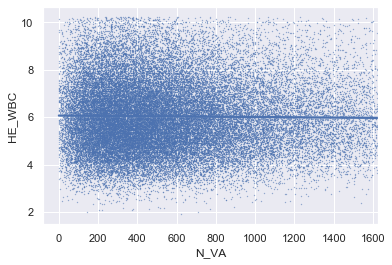

In [8]:
# 비타민A 섭취량과 혈중 백혈구 농도간의 단순 관계
sns.regplot(data = data, x = 'N_VA', y = 'HE_WBC', scatter_kws = {'s':0.1})

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


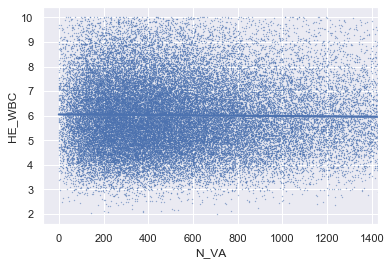

In [9]:
# 이상치 제거
def removeOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    # 1.5 * IQR(Q3 - Q1)
    iqt = 1.5 * (q3 - q1)
    # 원래 데이터 복제
    y = x
    # 이상치를 NA로 변환
    y[column][(data[column] > (q3 + iqt)) | (data[column] < (q1 - iqt))] = None
    return(y)

removeOutliers(data,'N_VA')
removeOutliers(data,'HE_WBC')
a1 = data[['N_VA','HE_WBC']].dropna()

sns.regplot(data = a1, x = 'N_VA', y = 'HE_WBC', scatter_kws = {'s':0.1})

### 성별, 나이대 별 비타민A 섭취량에 따른 HE_WBC 정상비율
1. 혈중 백혈구 농도를 건강상태와 그렇지 않은 상태로 구분함.
2. 비타민A 섭취량을 '복용량 부족', '적정량 복용', '과다복용'으로 나눔.
3. 혈중 백혈구 농도에 영향을 미칠 수 있는 요소[성별, 나이]별로 나눔.

In [91]:
data['혈중 백혈구 농도']=np.where((4.5<=data['HE_WBC'])&(9>=data['HE_WBC']),1,0)
data['나이대'] = ['20s' if 20<a< 30 else '30s' if 29<a<40  else '40s' if 39<a<50 else '50s'if 49<a< 60 else '60s' if 59<a<70 else '70s' if 69<a<80 else np.NaN for a in data['age']]
data['A_intake'] = ['Insufficient' if b<300 else 'Moderate' if b<3000 else 'Excessive' for b in data['N_VA']]

d1 = data[['혈중 백혈구 농도','A_intake','나이대','sex','age']].dropna()
d1.head(10)

,혈중 백혈구 농도,A_intake,나이대,sex,age
0,1,Excessive,60s,1,61
1,1,Excessive,50s,2,54
2,1,Moderate,30s,1,33
3,1,Insufficient,30s,2,33
5,1,Moderate,60s,1,65
6,1,Insufficient,50s,2,59
7,1,Moderate,50s,1,54
8,1,Insufficient,40s,2,49
10,1,Excessive,30s,1,32
11,1,Moderate,30s,2,32


In [92]:
A2m=pd.DataFrame(d1.query('sex=="1"').query('나이대=="20s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'20s Man'},axis='columns')
A2w=pd.DataFrame(d1.query('sex=="2"').query('나이대=="20s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'20s Woman'},axis='columns')
A3m=pd.DataFrame(d1.query('sex=="1"').query('나이대=="30s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'30s Man'},axis='columns')
A3w=pd.DataFrame(d1.query('sex=="2"').query('나이대=="30s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'30s Woman'},axis='columns')
A4m=pd.DataFrame(d1.query('sex=="1"').query('나이대=="40s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'40s Man'},axis='columns')
A4w=pd.DataFrame(d1.query('sex=="2"').query('나이대=="40s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'40s Woman'},axis='columns')
A5m=pd.DataFrame(d1.query('sex=="1"').query('나이대=="50s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'50s Man'},axis='columns')
A5w=pd.DataFrame(d1.query('sex=="2"').query('나이대=="50s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'50s Woman'},axis='columns')
A6m=pd.DataFrame(d1.query('sex=="1"').query('나이대=="60s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Man'},axis='columns')
A6w=pd.DataFrame(d1.query('sex=="2"').query('나이대=="60s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Woman'},axis='columns')
A7m=pd.DataFrame(d1.query('sex=="1"').query('나이대=="70s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Man'},axis='columns')
A7w=pd.DataFrame(d1.query('sex=="2"').query('나이대=="70s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Woman'},axis='columns')

In [93]:
df_2=pd.concat([A2m,A2w],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df_3=pd.concat([A3m,A3w],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df_4=pd.concat([A4m,A4w],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df_5=pd.concat([A5m,A5w],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df_6=pd.concat([A6m,A6w],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df_7=pd.concat([A7m,A7w],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])

### 20대

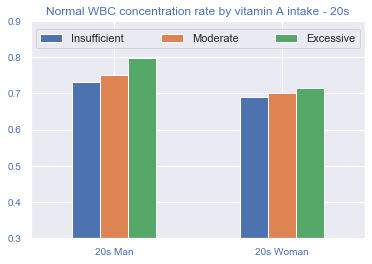

In [151]:
df_2.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - 20s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 30대

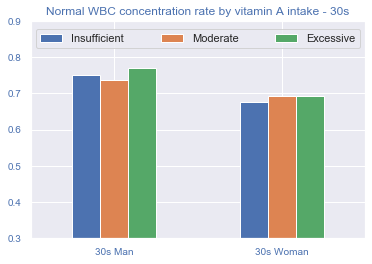

In [150]:
df_3.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - 30s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 40대

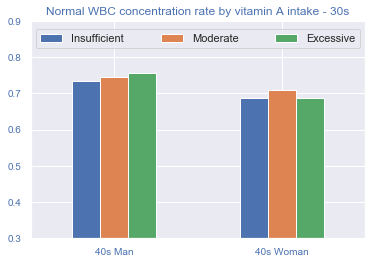

In [149]:
df_4.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - 30s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 50대

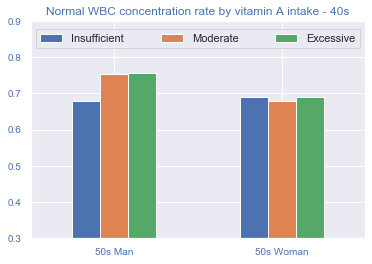

In [148]:
df_5.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - 40s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 60대

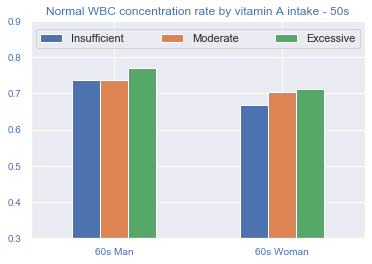

In [147]:
df_6.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - 50s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 70대 

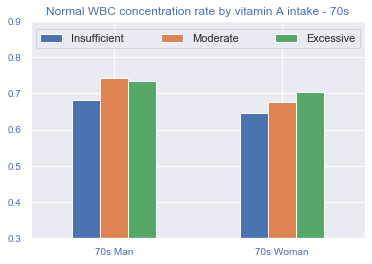

In [146]:
df_7.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - 70s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### Conclusion
1. 크진 않지만 대체적으로 선형적인 관계를 보임.
2. '혈중 백혈구 농도' 요소만 보았을때 비타민A를 과도하게 섭취하는 것이 오히려 좋은 경우가 많음.
2. 남성에 비해 여성이 혈중 백혈구 농도가 더 낮음.

------------

## 비타민 섭취량이 높은 사람에 대한 의문
비타민 섭취량이 높은 사람은 상대적으로 건강에 신경을 많이 쓰는 사람일 것이고, 그런 사람들은 몸 어딘가가 아플 확률이 높음. (몸이 안좋으니 건강에 신경을 씀.) <br>

→ 비타민 섭취량이 면역력에 도움을 준다고 하여도, 비타민섭취량이 많은 사람중 이미 면역력이 안좋은사람이 많아 이가 드러나지 않을 수 있음
    
    주관적으로 인지하는 자신의 건강상태를 기준으로 하여 평소에 많이 아프다고 느끼는 사람들을 기준으로 재비교

In [100]:
data['LQ_4EQL']

0       1.0
1       1.0
2       1.0
3       1.0
4       8.0
       ... 
8105    1.0
8106    1.0
8107    1.0
8108    8.0
8109    8.0
Name: LQ_4EQL, Length: 80861, dtype: float64

In [101]:
d2 = data[['혈중 백혈구 농도','A_intake','나이대','sex','age','LQ_4EQL']].dropna()
d2=d2[d2.LQ_4EQL !=1];d2=d2[d2.LQ_4EQL !=2];d2=d2[d2.LQ_4EQL !=8];d2=d2[d2.LQ_4EQL !=9]
d2.head(10)

,혈중 백혈구 농도,A_intake,나이대,sex,age,LQ_4EQL
240,1,Moderate,70s,1,70,3.0
572,1,Insufficient,70s,2,71,3.0
672,0,Insufficient,70s,2,70,3.0
754,0,Insufficient,60s,1,62,3.0
770,1,Insufficient,60s,2,69,3.0
825,1,Excessive,40s,1,49,3.0
841,1,Moderate,30s,2,34,3.0
874,0,Excessive,60s,1,67,3.0
1022,0,Moderate,70s,2,75,3.0
1064,1,Excessive,20s,2,27,3.0


In [102]:
d2['나이대'].value_counts()

70s    573
60s    343
50s    169
40s     59
30s     35
20s     11
Name: 나이대, dtype: int64

데이터의 양이 많아 의미가 있는 70대와 60대에 대해서만 분석.

In [111]:
A6m2=pd.DataFrame(d2.query('sex=="1"').query('나이대=="60s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Man'},axis='columns')
A6w2=pd.DataFrame(d2.query('sex=="2"').query('나이대=="60s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Woman'},axis='columns')
A7m2=pd.DataFrame(d2.query('sex=="1"').query('나이대=="70s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Man'},axis='columns')
A7w2=pd.DataFrame(d2.query('sex=="2"').query('나이대=="70s"').groupby('A_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Woman'},axis='columns')

df2_6=pd.concat([A6m2,A6w2],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df2_7=pd.concat([A7m2,A7w2],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])

### 60대

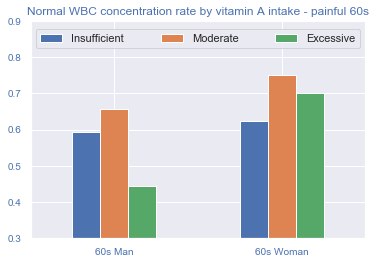

In [145]:
df2_6.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - painful 60s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 70대

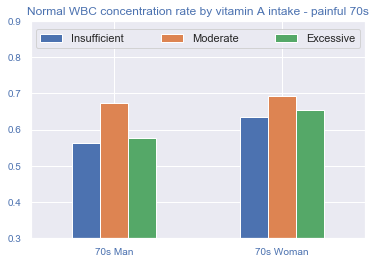

In [144]:
df2_7.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - painful 70s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### Conclusion
1. 비타민A 적정섭취시 다른 두 경우에 비해 높은 혈중 백혈구 농도를 보임.
2. 앞선 결과와 달리 남성보다 여성의 혈중 백혈구 농도가 더 높음.  
→ 여성에 비해 남성은 자신의 고통에 조금 더 무감각하다? 

---------

# 2. 비타민 C

### 흔히 알려진 비타민 C 의 효능 : 1. 면역작용, 2. 항산화작용
    비타민C가 면역작용향상에 미치는 영향을 알아보기 위해 사용한 국민건강영양조사에 있는 데이터 중 면역작용과 관련있는 데이터 : 혈중 백혈구 수치 (HE_WBC)

### 1. 면역작용

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


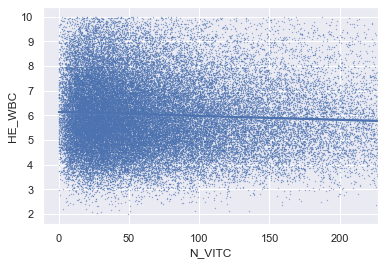

In [20]:
# 비타민A 섭취량과 혈중 백혈구 농도간의 단순 관계
removeOutliers(data,'N_VITC')
removeOutliers(data,'HE_WBC')
a2 = data[['N_VITC','HE_WBC']].dropna()
sns.regplot(data = a2, x = 'N_VITC', y = 'HE_WBC', scatter_kws = {'s':0.1})

### 성별, 나이대 별 비타민C 섭취량에 따른 HE_WBC 정상비율
1. 혈중 백혈구 농도를 건강상태와 그렇지 않은 상태로 구분함.
2. 비타민C 섭취량을 '복용량 부족', '적정량 복용', '과다복용'으로 나눔.
3. 혈중 백렬구 농도에 영향을 미칠 수 있는 요소[성별, 나이]별로 나눔.

In [21]:
data['C_intake'] = ['Insufficient' if b<100 else 'Moderate' if b<2000 else 'Excessive' for b in data['N_VITC']]
d3 = data[['혈중 백혈구 농도','C_intake','나이대','sex','age']].dropna()
d3.head(10)

,혈중 백혈구 농도,C_intake,나이대,sex,age
0,1,Excessive,60s,1,61
1,1,Excessive,50s,2,54
2,1,Insufficient,30s,1,33
3,1,Insufficient,30s,2,33
5,1,Insufficient,60s,1,65
6,1,Insufficient,50s,2,59
7,1,Moderate,50s,1,54
8,1,Insufficient,40s,2,49
10,1,Excessive,30s,1,32
11,1,Excessive,30s,2,32


In [22]:
A2m3=pd.DataFrame(d3.query('sex=="1"').query('나이대=="20s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'20s Man'},axis='columns')
A2w3=pd.DataFrame(d3.query('sex=="2"').query('나이대=="20s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'20s Woman'},axis='columns')
A3m3=pd.DataFrame(d3.query('sex=="1"').query('나이대=="30s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'30s Man'},axis='columns')
A3w3=pd.DataFrame(d3.query('sex=="2"').query('나이대=="30s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'30s Woman'},axis='columns')
A4m3=pd.DataFrame(d3.query('sex=="1"').query('나이대=="40s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'40s Man'},axis='columns')
A4w3=pd.DataFrame(d3.query('sex=="2"').query('나이대=="40s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'40s Woman'},axis='columns')
A5m3=pd.DataFrame(d3.query('sex=="1"').query('나이대=="50s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'50s Man'},axis='columns')
A5w3=pd.DataFrame(d3.query('sex=="2"').query('나이대=="50s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'50s Woman'},axis='columns')
A6m3=pd.DataFrame(d3.query('sex=="1"').query('나이대=="60s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Man'},axis='columns')
A6w3=pd.DataFrame(d3.query('sex=="2"').query('나이대=="60s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Woman'},axis='columns')
A7m3=pd.DataFrame(d3.query('sex=="1"').query('나이대=="70s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Man'},axis='columns')
A7w3=pd.DataFrame(d3.query('sex=="2"').query('나이대=="70s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Woman'},axis='columns')

In [23]:
df3_2=pd.concat([A2m3,A2w3],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df3_3=pd.concat([A3m3,A3w3],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df3_4=pd.concat([A4m3,A4w3],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df3_5=pd.concat([A5m3,A5w3],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df3_6=pd.concat([A6m3,A6w3],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df3_7=pd.concat([A7m3,A7w3],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])

### 20대

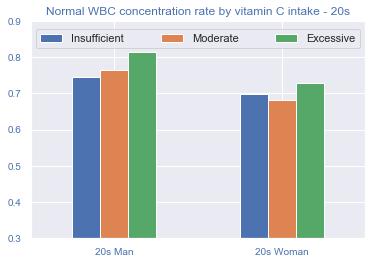

In [143]:
df3_2.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - 20s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 30대

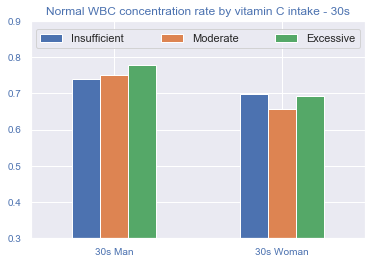

In [142]:
df3_3.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - 30s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 40대

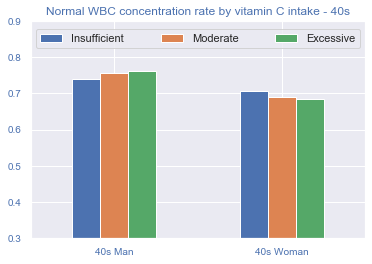

In [141]:
df3_4.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - 40s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 50대

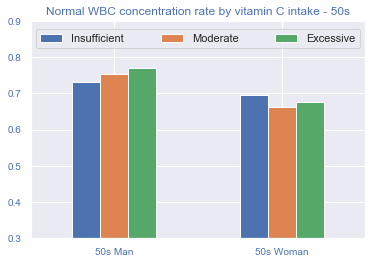

In [140]:
df3_5.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - 50s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 60대

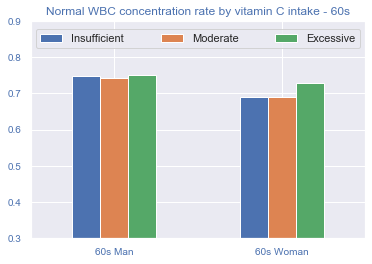

In [139]:
df3_6.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - 60s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 70대

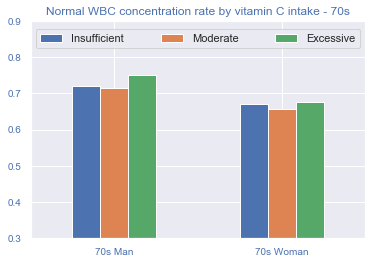

In [138]:
df3_7.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - 70s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

비타민 A의 경우와 마찬가지로 평소 많은 고통을 느끼는 사람들을 대상으로 비교

In [74]:
d4 = data[['혈중 백혈구 농도','C_intake','나이대','sex','age','LQ_4EQL']].dropna()
d4=d4[d4.LQ_4EQL !=1];d4=d4[d4.LQ_4EQL !=2];d4=d4[d4.LQ_4EQL !=8];d4=d4[d4.LQ_4EQL !=9]
d4.head(10)

,혈중 백혈구 농도,C_intake,나이대,sex,age,LQ_4EQL
240,1,Insufficient,70s,1,70,3.0
572,1,Insufficient,70s,2,71,3.0
672,0,Insufficient,70s,2,70,3.0
754,0,Insufficient,60s,1,62,3.0
770,1,Moderate,60s,2,69,3.0
825,1,Moderate,40s,1,49,3.0
841,1,Insufficient,30s,2,34,3.0
874,0,Insufficient,60s,1,67,3.0
1022,0,Moderate,70s,2,75,3.0
1064,1,Moderate,20s,2,27,3.0


In [38]:
A6m4=pd.DataFrame(d4.query('sex=="1"').query('나이대=="60s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Man'},axis='columns')
A6w4=pd.DataFrame(d4.query('sex=="2"').query('나이대=="60s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'60s Woman'},axis='columns')
A7m4=pd.DataFrame(d4.query('sex=="1"').query('나이대=="70s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Man'},axis='columns')
A7w4=pd.DataFrame(d4.query('sex=="2"').query('나이대=="70s"').groupby('C_intake')['혈중 백혈구 농도'].mean()).rename({'혈중 백혈구 농도':'70s Woman'},axis='columns')

df4_6=pd.concat([A6m4,A6w4],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])
df4_7=pd.concat([A7m4,A7w4],axis=1).reindex(index=['Insufficient','Moderate','Excessive'])

### 60대

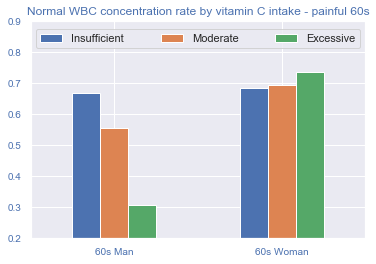

In [137]:
df4_6.transpose().plot.bar()
plt.ylim(0.2,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - painful 60s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

### 70대

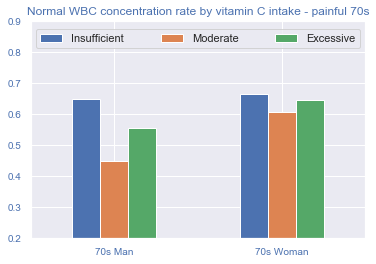

In [136]:
df4_7.transpose().plot.bar()
plt.ylim(0.2,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - painful 70s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

In [115]:
d4_abN = d4[d4.C_intake !='Moderate']
c_70m0=pd.DataFrame(d4_abN.query('sex=="1"').query('나이대=="70s"')['혈중 백혈구 농도'])
c_70m1=pd.DataFrame(d4.query('sex=="1"').query('나이대=="70s"').query('C_intake=="Moderate"')['혈중 백혈구 농도'])

c_70w0=pd.DataFrame(d4_abN.query('sex=="2"').query('나이대=="70s"')['혈중 백혈구 농도'])
c_70w1=pd.DataFrame(d4.query('sex=="2"').query('나이대=="70s"').query('C_intake=="Moderate"')['혈중 백혈구 농도'])

c_test_70W=stats.ttest_ind(c_70w0,c_70w1)
c_test_70M=stats.ttest_ind(c_70m0,c_70m1)
print(c_test_70M)
print(c_test_70W)

Ttest_indResult(statistic=array([1.593]), pvalue=array([0.114]))
Ttest_indResult(statistic=array([0.814]), pvalue=array([0.416]))


### Conclusion
비타민 C섭취량과 혈중 백혈구 농도는 별 관게가 없다. 
(이는 실제로 관계가 없을수도 있고, 조사 데이터의 부족 또는 고려하지 못한 외부요인에 의한 작용일 수 있음.)

+ 비타민C는 백혈구의 활동을 개선함. 즉, 백혈구의 수가 아닌 백혈구의 질에 영향을 미침

---------

### 2. 항산화 작용
체내의 여러 세포가 활성산소에 의해 손상되는 것을 막음.

    고혈압, 각종 암, 관절염 예방 등의 효과가 있지만, 환자 수 확보 및 데이터에 존재하는 비교 요소(여기서는 혈압)를 고려하여 고혈압만을 다룸.

가. 비타민C 섭취량에 따른 고혈압환자 비율

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

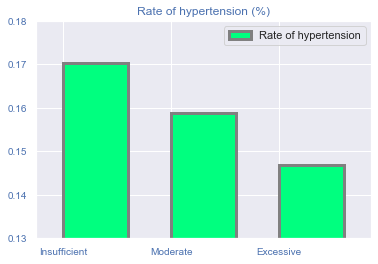

In [134]:
data2=data[['나이대','sex','age','HE_sbp','HE_dbp','C_intake','DI1_pr']]
r1 = len(data2[(data2['DI1_pr']==1)&(data2['C_intake']=='Insufficient')])/len(data2[data2['C_intake']=='Insufficient'])
r2 = len(data2[(data2['DI1_pr']==1)&(data2['C_intake']=='Moderate')])/len(data2[data2['C_intake']=='Moderate'])
r3 = len(data2[(data2['DI1_pr']==1)&(data2['C_intake']=='Excessive')])/len(data2[data2['C_intake']=='Excessive'])
d0={'Insufficient':[r1],'Moderate':[r2],'Excessive':[r3]}
df5=pd.DataFrame(d0, index=['Rate of hypertension'])

df5.transpose().plot.bar(width=0.6, align='edge', color="springgreen",edgecolor="gray", linewidth=3)
plt.ylim(0.13,0.18)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Rate of hypertension (%)', color='b')
plt.xticks(rotation =0)

나. 고혈압환자 중 혈압조절제를 먹지 않는 환자들을 대상으로 한 비타민C 섭취량에 따른 이완기,수축기 혈압

In [745]:
data1=data[(data['DI1_pr']==1)&(data['DI1_2']==5)]
data1['나이대'] = ['20s' if 20<a< 30 else '30s' if 29<a<40  else '40s' if 39<a<50 else '50s'if 49<a< 60 else '60s' if 59<a<70 else '70s' if 69<a<80 else np.NaN for a in data1['age']]

data1 = data1[['나이대','sex','age','HE_sbp','HE_dbp','C_intake']].dropna()
data1

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,나이대,sex,age,HE_sbp,HE_dbp,C_intake
55,60s,2,69,180.0,98.0,Insufficient
88,30s,1,37,115.0,80.0,Excessive
127,50s,1,58,148.0,100.0,Insufficient
135,60s,1,61,150.0,78.0,Insufficient
159,50s,2,52,205.0,135.0,Insufficient
...,...,...,...,...,...,...
6945,60s,1,63,143.0,78.0,Excessive
7045,70s,2,73,176.0,98.0,Insufficient
7358,50s,2,52,125.0,84.0,Insufficient
7639,50s,1,58,136.0,89.0,Excessive


### 이완기 혈압

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

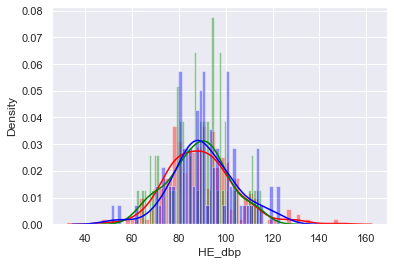

In [746]:
sns.distplot(data1[data1['C_intake']=='Insufficient'].HE_dbp,color = 'red',bins=50)
sns.distplot(data1[data1['C_intake']=='Moderate'].HE_dbp,color = 'green',bins=50)
sns.distplot(data1[data1['C_intake']=='Excessive'].HE_dbp,color = 'blue',bins=50)

### 수축기 혈압

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

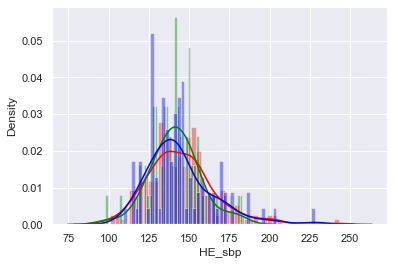

In [747]:
sns.distplot(data1[data1['C_intake']=='Insufficient'].HE_sbp,color = 'red',bins=50)
sns.distplot(data1[data1['C_intake']=='Moderate'].HE_sbp,color = 'green',bins=50)
sns.distplot(data1[data1['C_intake']=='Excessive'].HE_sbp,color = 'blue',bins=50)

### Conclusion
1. 비타민 C의 섭취와 고혈압발병 유무는 미세한 관계가 있음 → 고혈압 예방에 도움이 될 수 있음.
2. 비타민 C의 섭취는 고혈압 환자에게는 큰 도움이 되지 않음.

----------

# + 피드백 후 수정본 및 새로 추가한 부분

평소 자신의 건간상태가 좋지 않다고 느끼는 사람들을 대상으로 수행한 비타민 A,C섭취량에 따른 혈중 백혈구 농도 정상수치 비율의 차를 비교하는 수행이 과연 우연에 의한 일치인지 t검정을 통해 확인하고자 함.

    각 그래프가 통계적으로 유의한지 알아보기 위해, 남성과 여성 각각 '비타민 적정섭취자들'과 '그렇지 않은 사람들' 두 개의 그룹으로 나누어 개별 그룹 내에서 백혈구 수치가 정상인 사람들의 비율이 차이나는지 ttest를 이용해 검정해봄.

-----

### 비타민 A

##### 60대

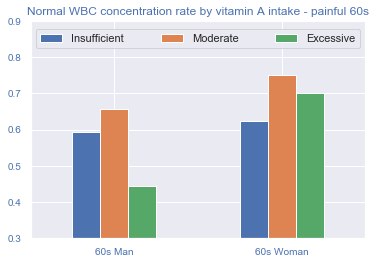

In [133]:
# 건강상태가 좋지 않다고 인지하는 60대의 비타민A 섭취량에 따른 백혈구 농도 정상수치 비율.
df2_6.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - painful 60s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

In [117]:
d2_abN = d2[d2.A_intake !='Moderate']
a_60m0=pd.DataFrame(d2_abN.query('sex=="1"').query('나이대=="60s"')['혈중 백혈구 농도'])
a_60m1=pd.DataFrame(d2.query('sex=="1"').query('나이대=="60s"').query('A_intake=="Moderate"')['혈중 백혈구 농도'])

a_60w0=pd.DataFrame(d2_abN.query('sex=="2"').query('나이대=="60s"')['혈중 백혈구 농도'])
a_60w1=pd.DataFrame(d2.query('sex=="2"').query('나이대=="60s"').query('A_intake=="Moderate"')['혈중 백혈구 농도'])

a_test_60W=stats.ttest_ind(a_60w0,a_60w1)
a_test_60M=stats.ttest_ind(a_60m0,a_60m1)
print(a_test_60M)
print(a_test_60W)

Ttest_indResult(statistic=array([-1.075]), pvalue=array([0.286]))
Ttest_indResult(statistic=array([-1.719]), pvalue=array([0.087]))


##### 70대

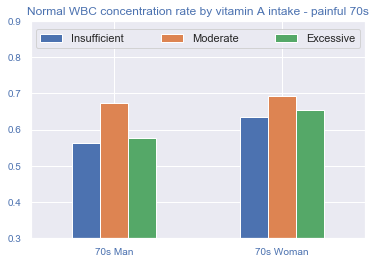

In [132]:
# 건강상태가 좋지 않다고 인지하는 70대의 비타민A 섭취량에 따른 백혈구 농도 정상수치 비율.
df2_7.transpose().plot.bar()
plt.ylim(0.3,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin A intake - painful 70s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

In [126]:
d2_abN = d2[d2.A_intake !='Moderate']
a_70m0=pd.DataFrame(d2_abN.query('sex=="1"').query('나이대=="70s"')['혈중 백혈구 농도'])
a_70m1=pd.DataFrame(d2.query('sex=="1"').query('나이대=="70s"').query('A_intake=="Moderate"')['혈중 백혈구 농도'])

a_70w0=pd.DataFrame(d2_abN.query('sex=="2"').query('나이대=="70s"')['혈중 백혈구 농도'])
a_70w1=pd.DataFrame(d2.query('sex=="2"').query('나이대=="70s"').query('A_intake=="Moderate"')['혈중 백혈구 농도'])

a_test_70W=stats.ttest_ind(a_70w0,a_70w1)
a_test_70M=stats.ttest_ind(a_70m0,a_70m1)
print(a_test_70M)
print(a_test_70W)

Ttest_indResult(statistic=array([-1.157]), pvalue=array([0.25]))
Ttest_indResult(statistic=array([-1.115]), pvalue=array([0.265]))


ttest 결과 모든 p값이 통계적으로 유의하지 않음을 나타낸다. 이는 비타민은 의약품이 아니므로 신체에 막대한 영향을 미치지 않고 미세한 영향만 미치며, 이러한 미세한 영향을 감지하기에는 데이터의 수가 부족했다. 라고 해석할 수 있다. 데이터가 더 많아진다면 통계적으로 유의한 결과가 나올 수 있을것이라 기대한다. 아래는 실제 사용된 데이터의 수 이다.

In [128]:
d2.groupby('sex')['나이대'].value_counts()

sex  나이대
1    70s    120
     60s     85
     50s     56
     40s     20
     30s     12
     20s      6
2    70s    453
     60s    258
     50s    113
     40s     39
     30s     23
     20s      5
Name: 나이대, dtype: int64

-----

### 비타민 C

#### 60대

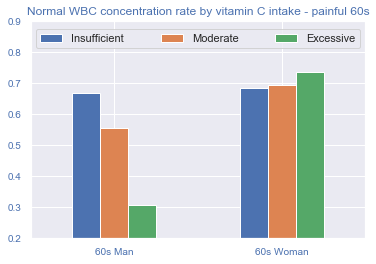

In [131]:
# 건강상태가 좋지 않다고 인지하는 60대의 비타민C 섭취량에 따른 백혈구 농도 정상수치 비율.
df4_6.transpose().plot.bar()
plt.ylim(0.2,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - painful 60s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

In [123]:
d4_abN = d4[d4.C_intake !='Moderate']
c_60m0=pd.DataFrame(d4_abN.query('sex=="1"').query('나이대=="60s"')['혈중 백혈구 농도'])
c_60m1=pd.DataFrame(d4.query('sex=="1"').query('나이대=="60s"').query('C_intake=="Moderate"')['혈중 백혈구 농도'])

c_60w0=pd.DataFrame(d4_abN.query('sex=="2"').query('나이대=="60s"')['혈중 백혈구 농도'])
c_60w1=pd.DataFrame(d4.query('sex=="2"').query('나이대=="60s"').query('C_intake=="Moderate"')['혈중 백혈구 농도'])

c_test_60=stats.ttest_ind(c_60w0,c_60w1)
c_test_60M=stats.ttest_ind(c_60m0,c_60m1)
print(c_test_60M)
print(c_test_60W)

Ttest_indResult(statistic=array([0.314]), pvalue=array([0.755]))
Ttest_indResult(statistic=array([0.464]), pvalue=array([0.643]))


#### 70대

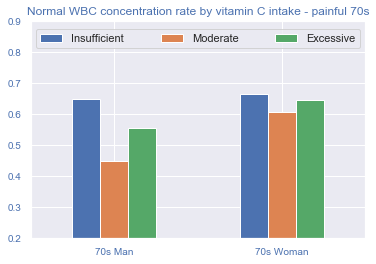

In [130]:
# 건강상태가 좋지 않다고 인지하는 70대의 비타민C 섭취량에 따른 백혈구 농도 정상수치 비율.
df4_7.transpose().plot.bar()
plt.ylim(0.2,0.9)
plt.xticks(fontsize = 10, color = 'b')
plt.yticks(fontsize = 10, color = 'b')
plt.title('Normal WBC concentration rate by vitamin C intake - painful 70s', color='b')
plt.xticks(rotation =0)
plt.legend(loc='lower left',mode='expand',ncol=3, bbox_to_anchor=(0,0.85,1,0.2))

In [129]:
d4_abN = d4[d4.C_intake !='Moderate']
c_70m0=pd.DataFrame(d4_abN.query('sex=="1"').query('나이대=="70s"')['혈중 백혈구 농도'])
c_70m1=pd.DataFrame(d4.query('sex=="1"').query('나이대=="70s"').query('C_intake=="Moderate"')['혈중 백혈구 농도'])

c_70w0=pd.DataFrame(d4_abN.query('sex=="2"').query('나이대=="70s"')['혈중 백혈구 농도'])
c_70w1=pd.DataFrame(d4.query('sex=="2"').query('나이대=="70s"').query('C_intake=="Moderate"')['혈중 백혈구 농도'])

c_test_70W=stats.ttest_ind(c_70w0,c_70w1)
c_test_70M=stats.ttest_ind(c_70m0,c_70m1)
print(c_test_70M)
print(c_test_70W)

Ttest_indResult(statistic=array([1.593]), pvalue=array([0.114]))
Ttest_indResult(statistic=array([0.814]), pvalue=array([0.416]))


ttest 결과 모든 p값이 통계적으로 유의하지 않음을 나타낸다. 이는 비타민은 의약품이 아니므로 신체에 막대한 영향을 미치지 않고 미세한 영향만 미치며, 이러한 미세한 영향을 감지하기에는 데이터의 수가 부족했다. 라고 해석할 수 있다. 데이터가 더 많아진다면 통계적으로 유의한 결과가 나올 수 있을것이라 기대한다.아래는 실제 사용된 데이터의 수 이다.

    하지만 비타민A에서는 p값이 0.2정도에 머물렀던 반면, 비타민C에서는 0.7이나 0.6 등의 값들이 나오는 것으로 미루어 보아, 비타민C에 의한 백혈구 농도 증가는 비타민A보다 더 신뢰성이 떨어진다고 생각할 수 있다. 이는 비타민C는 백혈구의 수에 직접적인 영향을 미치는 것이 아니기 때문인 것으로 추측된다. 즉, 비타민C가 백혈구의 활동을 개선할지언정, 수 자체를 늘리는 데에는 큰 도움을 주는 것이 아니다.

In [125]:
d4.groupby('sex')['나이대'].value_counts()

sex  나이대
1    70s    120
     60s     85
     50s     56
     40s     20
     30s     12
     20s      6
2    70s    453
     60s    258
     50s    113
     40s     39
     30s     23
     20s      5
Name: 나이대, dtype: int64

    조금만 더 생각 해 보면 60대와 70내 남자에서 다른 데이터들과 유독 차이가 나는 특이한 그래프 형태가 나타나는데, 이는 자신의 건강상태가 좋지 않다고 생각하는 사람들은 남성이 여성에 비해 훨씬 그 수가 작아서 데이터의 부족에 의한 결과라고 생각할 수 있다. 앞선 비타민A에서는 남성의 데이터가 선형적인 것 처럼 보였던 것은 우연에 의한 것이라 추측된다.

-----